# We will build a simple convolution network by *Tensorflow 2.0* to classify the handwritten digits dataset: MNIST

Tensorflow: https://www.tensorflow.org/

- **Requirements**
    - python==3.6
    - tensorflow==2.0
    - numpy==1.17
    - matplotlib==3.1.2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

## Step 1: prepare our dataset

- First, load the MNIST dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train[..., None], x_test[..., None]

In [3]:
# We can find that we have 60000 pictures of handwritten digits in the training set, and 10000 in the testing set.
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

- Preview of MNIST

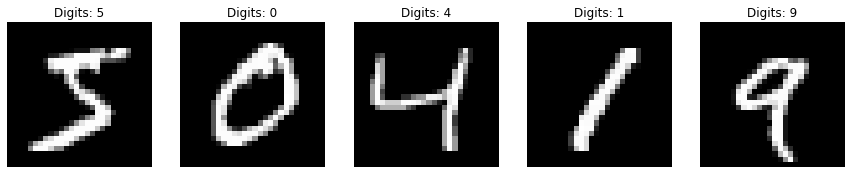

In [4]:
# the usage of matplotlib.pyplot module is like MATLAB
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i, ..., 0], cmap='gray')
    plt.axis('off')
    plt.title('Digits: '+str(y_train[i]))
plt.show()

- Apply one-hot encoding to the labels <br>
one-hot encoding: https://zhuanlan.zhihu.com/p/37471802

In [5]:
# before one-hot encoding
y_train.shape, y_train[:10]

((60000,), array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8))

In [6]:
# after one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
y_train.shape, y_train[:10]

((60000, 10), array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32))

## Step2: build the convolutional neural network

- The overall architecture: <br><br>
<img src="./imgs/CNN_ALL_mnist.png" width="60%" height="60%">

- Input layer: <br><br>
<img src="./imgs/CNN_xy_mnist.png" width="60%" height="60%">

In [7]:
inputs = tf.keras.layers.Input(shape=(28, 28, 1))

- Conv layers: <br><br>
<img src="./imgs/CNN_conv12conv2_mnist.png" width="60%" height="60%">

In [8]:
conv1 = tf.keras.layers.Conv2D(
    filters=16, 
    kernel_size=(3, 3),
    padding='same',
    activation='relu'
)
norm1 = tf.keras.layers.BatchNormalization()
pool1 = tf.keras.layers.MaxPool2D()

In [9]:
conv2 = tf.keras.layers.Conv2D(
    filters=32, 
    kernel_size=(3, 3),
    padding='same',
    activation='relu'
)
norm2 = tf.keras.layers.BatchNormalization()
pool2 = tf.keras.layers.MaxPool2D()

- Flatten layer: <br><br>
<img src="./imgs/CNN_conv22flatten_mnist.png" width="60%" height="60%">

In [10]:
flat3 = tf.keras.layers.Flatten()

- Dense (fully-connected) layer and output layer: <br><br>
<img src="./imgs/CNN_hidden2output_mnist.png" width="60%" height="60%">

In [11]:
dense4 = tf.keras.layers.Dense(
    units=64,
    activation='relu'
)
drop4 = tf.keras.layers.Dropout(rate=0.5)

In [12]:
outputs = tf.keras.layers.Dense(
    units=10,
    activation='softmax'
)

### Combine the layers we built before together

In [13]:
layers = [
    inputs,
    conv1,
    norm1,
    pool1,
    conv2,
    norm2,
    pool2,
    flat3,
    dense4,
    drop4,
    outputs
]
model = tf.keras.models.Sequential(layers)

- Choose our loss function and optimizer

In [14]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.SGD(
    learning_rate=1e-2,
    momentum=.5
)
model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=['acc']
)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

## Step 3: training

In [16]:
# we take the test set as validation set here
h = model.fit(
    x=x_train,
    y=y_train,
    batch_size=128,
    epochs=20,
    validation_data=(x_test, y_test),
    verbose=1
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 95us/sample - loss: 0.4757 - acc: 0.8515 - val_loss: 0.0998 - val_acc: 0.9695
Epoch 2/20
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2045 - acc: 0.9376 - val_loss: 0.0653 - val_acc: 0.9779
Epoch 3/20
60000/60000 [==============================] - 2s 42us/sample - loss: 0.1558 - acc: 0.9535 - val_loss: 0.0568 - val_acc: 0.9806
Epoch 4/20
60000/60000 [==============================] - 2s 41us/sample - loss: 0.1301 - acc: 0.9611 - val_loss: 0.0466 - val_acc: 0.9845
Epoch 5/20
60000/60000 [==============================] - 2s 41us/sample - loss: 0.1127 - acc: 0.9663 - val_loss: 0.0467 - val_acc: 0.9856
Epoch 6/20
60000/60000 [==============================] - 3s 42us/sample - loss: 0.1003 - acc: 0.9707 - val_loss: 0.0435 - val_acc: 0.9861
Epoch 7/20
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0892 - acc: 0.9740 - val_loss: 0.

## Excercise: CIFAR 10 dataset

In [19]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step
